In [1]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Part 1
## Read the data
Used pandas library to read the input dataset and print the column names.

In [2]:
# %%
raw = pd.read_csv('salary.dat')
raw.head()
raw.columns

Index(['# Company', ' Experience', ' Salary'], dtype='object')

Clean the data by removed spacing before and after the company names.

In [3]:
# %%
for i in range(len(raw.loc[:, '# Company'])):
    raw.loc[i,'# Company'] = raw.loc[i,'# Company'].strip()
    
print(raw)

   # Company   Experience   Salary
0          A          0.0    30890
1          A          2.1    38020
2          A          2.2    40690
3          A          2.7    39040
4          A          2.7    40080
..       ...          ...      ...
58         C          8.4    62370
59         C          8.7    57100
60         C          9.1    58860
61         C          9.8    66140
62         C         10.0    62650

[63 rows x 3 columns]


Assign variables to the data.

In [4]:
# %%
xA = raw.loc[(raw['# Company'] == 'A'), ' Experience']; yA = raw.loc[(raw['# Company'] == 'A'), ' Salary']
xB = raw.loc[(raw['# Company'] == 'B'), ' Experience']; yB = raw.loc[(raw['# Company'] == 'B'), ' Salary']
xC = raw.loc[(raw['# Company'] == 'C'), ' Experience']; yC = raw.loc[(raw['# Company'] == 'C'), ' Salary']
xA_plot = np.linspace(xA.min(), xA.max(), 1000)
xB_plot = np.linspace(xB.min(), xB.max(), 1000)
xC_plot = np.linspace(xC.min(), xC.max(), 1000)

## Plot of sarary against the years of experience.

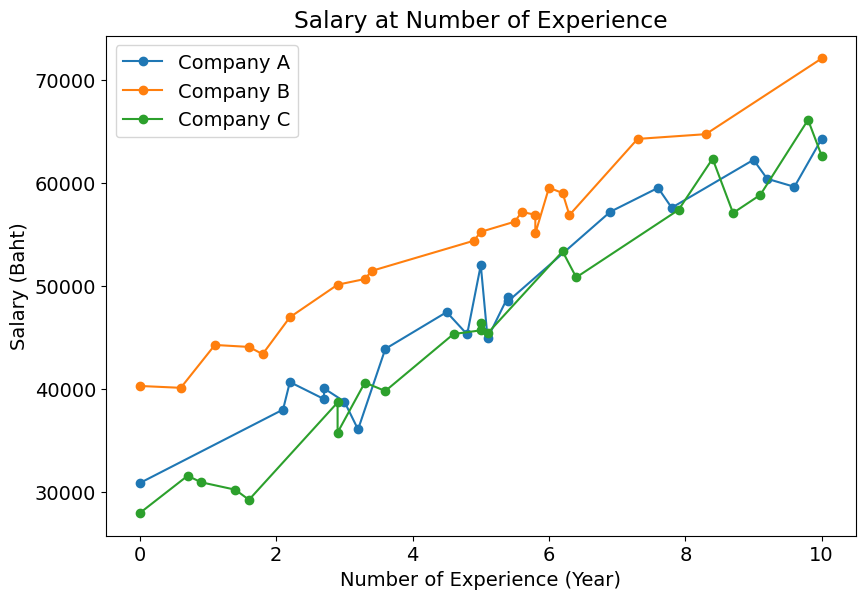

In [5]:
# %% Plot data
plt.rcParams['font.size'] = '14'
fig_data = plt.figure(figsize=(15,10), )
ax_data = fig_data.add_axes([0.1, 0.1, 0.5, 0.5])
ax_data.plot(xA, yA, '-o', label='Company A')
ax_data.plot(xB, yB, '-o', label='Company B')
ax_data.plot(xC, yC, '-o', label='Company C')
ax_data.set_xlabel('Number of Experience (Year)')
ax_data.set_ylabel('Salary (Baht)')
ax_data.set_title('Salary at Number of Experience')
plt.legend()
fig_data.show()

## Fit linear model $y = \beta_{0} + \beta_{1}x_i$ for $i=1,2,3$
Build model to fit to data

In [6]:
# %% Create a model function
def linear_1v(beta, x):
    yp = (beta[1] * x) + beta[0]
    return yp

def rss_lin1v(beta, x, y):
    yp = linear_1v(beta, x)
    loss = np.sum((y - yp)**2)
    return loss

Use minimize function from Scipy.optimize library to fit a model with the dataset.

In [7]:
# %% 
beta_init = [0.0, 0.0]
resultA = minimize(rss_lin1v, beta_init, args=(xA, yA))
resultB = minimize(rss_lin1v, beta_init, args=(xB, yB))
resultC = minimize(rss_lin1v, beta_init, args=(xC, yC))
betaA = resultA['x']
betaB = resultB['x']
betaC = resultC['x']

Use the fitted model to predict the trends of salary against the experiences.

In [8]:
ypred_A = linear_1v(betaA, xA_plot)
ypred_B = linear_1v(betaB, xB_plot)
ypred_C = linear_1v(betaC, xC_plot)

Plot the trends and data of salary against the experiences.

Fit parameters of company A:[30652.06815192  3388.95075132] 
Fit parameters of company B:[39562.66509317  3125.14944113] 
Fit parameters of company C:[26880.30854801  3788.72561378] 


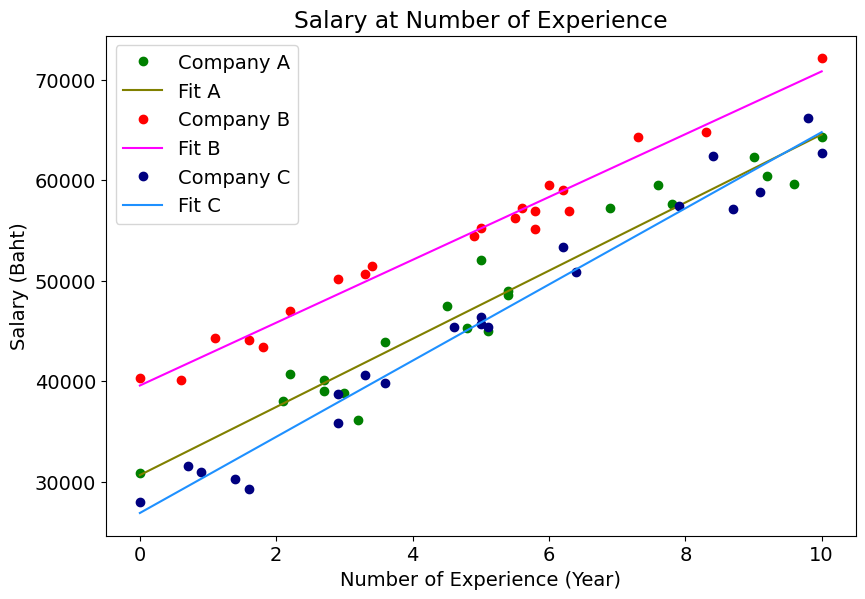

In [9]:
# %% Plot data
fig_fit1v = plt.figure(figsize=(15,10), )
ax_fit1v = fig_fit1v.add_axes([0.1, 0.1, 0.5, 0.5])
ax_fit1v.plot(xA, yA, 'o', label='Company A', color='green')
ax_fit1v.plot(xA_plot, ypred_A, '-', label='Fit A', color='olive')
ax_fit1v.plot(xB, yB, 'o', label='Company B', color = 'red')
ax_fit1v.plot(xB_plot, ypred_B, '-', label='Fit B', color = 'magenta')
ax_fit1v.plot(xC, yC, 'o', label='Company C', color = 'navy')
ax_fit1v.plot(xC_plot, ypred_C, '-', label='Fit C', color = 'dodgerblue')
ax_fit1v.set_xlabel('Number of Experience (Year)')
ax_fit1v.set_ylabel('Salary (Baht)')
ax_fit1v.set_title('Salary at Number of Experience')
plt.legend()
fig_fit1v.show()
print(f'Fit parameters of company A:{betaA} ')
print(f'Fit parameters of company B:{betaB} ')
print(f'Fit parameters of company C:{betaC} ')

# Part 2
Encode the company as a feature of the data to be used in fitting the model.

In [10]:
x_company = pd.get_dummies(raw.loc[:, '# Company']).drop('C', axis=1)
X1 = raw[' Experience'].copy()
X2 = x_company['A'].copy()
X3 = x_company['B'].copy()
y = raw[' Salary']

## Create and fit a linear model,<br> $y = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3$ to the whole dataset
Build a model with five parameters fitting on four variables.

In [12]:
# %% Create a model function
def linear_3v(beta, x1, x2, x3):
    yp = (beta[3] *x3) + (beta[2] * x2) + (beta[1] * x1) + beta[0]
    return yp

def rss_lin3v(beta, x1, x2, x3, y):
    yp = linear_3v(beta, x1, x2, x3)
    loss = np.sum((y - yp)**2)
    return loss

In [13]:
beta_init3v = [0.0, 0.0, 0.0, 0.0]
result_3v = minimize(rss_lin3v, beta_init3v, args=(X1, X2, X3, y))
beta3v = result_3v['x']

In [14]:
len(xA)

21

In [15]:
ypred_A3v = linear_3v(beta3v, xA_plot, np.ones(1000), np.zeros(1000))
ypred_B3v = linear_3v(beta3v, xB_plot, np.zeros(1000), np.ones(1000))
ypred_C3v = linear_3v(beta3v, xC_plot, np.zeros(1000), np.zeros(1000))

Fit parameters:[28424.26703777  3475.46407122  1775.45473043  9576.98293606]


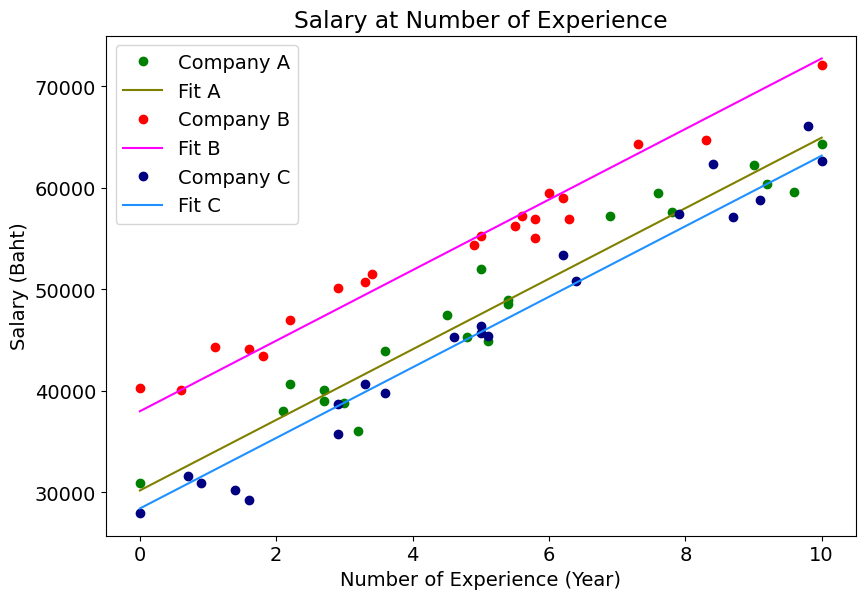

In [16]:
# %% Plot data
fig_fit3v = plt.figure(figsize=(15,10), )
ax_fit3v = fig_fit3v.add_axes([0.1, 0.1, 0.5, 0.5])
ax_fit3v.plot(xA, yA, 'o', label='Company A', color='green')
ax_fit3v.plot(xA_plot, ypred_A3v, '-', label='Fit A', color='olive')
ax_fit3v.plot(xB, yB, 'o', label='Company B', color = 'red')
ax_fit3v.plot(xB_plot, ypred_B3v, '-', label='Fit B', color = 'magenta')
ax_fit3v.plot(xC, yC, 'o', label='Company C', color = 'navy')
ax_fit3v.plot(xC_plot, ypred_C3v, '-', label='Fit C', color = 'dodgerblue')
ax_fit3v.set_xlabel('Number of Experience (Year)')
ax_fit3v.set_ylabel('Salary (Baht)')
ax_fit3v.set_title('Salary at Number of Experience')
plt.legend()
fig_fit3v.show()
print(f'Fit parameters:{beta3v}')

# Part 3
In part (2), the model is lacked of parameters that fit for the slope of each company data and only change the y-intercept when the company is changed, which cannot express the data as well as part one.

# Part 4
## Add two interaction terms to the model in part (2)
Then, the model become $y = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_1 x_2 + \beta_{5}x_1 x_3$

The term $x_2 x_3$ is meaningless because the result is zero.

In [17]:
# %% Create a model function
def linear_3vI(beta, x1, x2, x3):
    yp = (beta[5] * x1 * x3) + (beta[4] * x1 * x2) + (beta[3] *x3) + (beta[2] * x2) + (beta[1] * x1) + beta[0]
    return yp

def rss_lin3vI(beta, x1, x2, x3, y):
    yp = linear_3vI(beta, x1, x2, x3)
    loss = np.sum((y - yp)**2)
    return loss

In [21]:
beta_init3vI = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
result_3vI = minimize(rss_lin3vI, beta_init3vI, args=(X1, X2, X3, y))
beta3vI = result_3vI['x']

In [22]:
ypred_A3vI = linear_3vI(beta3vI, xA_plot, np.ones(1000), np.zeros(1000))
ypred_B3vI = linear_3vI(beta3vI, xB_plot, np.zeros(1000), np.ones(1000))
ypred_C3vI = linear_3vI(beta3vI, xC_plot, np.zeros(1000), np.zeros(1000))

Fit parameters:[26880.40111565  3788.70977895  3771.72134632 12682.26404295
  -399.76872201  -663.55753611]


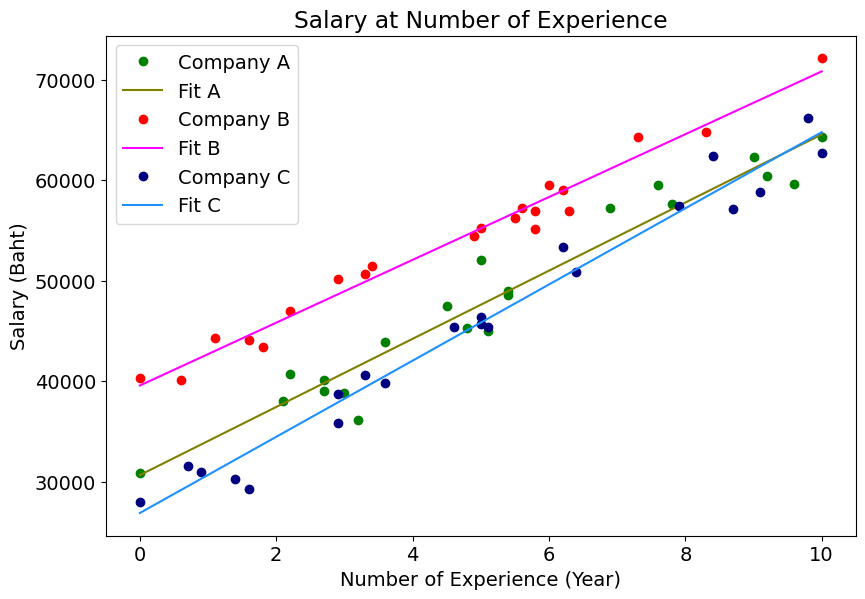

In [23]:
# %% Plot data
fig_fit3vI = plt.figure(figsize=(15,10), )
ax_fit3vI = fig_fit3vI.add_axes([0.1, 0.1, 0.5, 0.5])
ax_fit3vI.plot(xA, yA, 'o', label='Company A', color='green')
ax_fit3vI.plot(xA_plot, ypred_A3vI, '-', label='Fit A', color='olive')
ax_fit3vI.plot(xB, yB, 'o', label='Company B', color = 'red')
ax_fit3vI.plot(xB_plot, ypred_B3vI, '-', label='Fit B', color = 'magenta')
ax_fit3vI.plot(xC, yC, 'o', label='Company C', color = 'navy')
ax_fit3vI.plot(xC_plot, ypred_C3vI, '-', label='Fit C', color = 'dodgerblue')
ax_fit3vI.set_xlabel('Number of Experience (Year)')
ax_fit3vI.set_ylabel('Salary (Baht)')
ax_fit3vI.set_title('Salary at Number of Experience')
plt.legend()
fig_fit3vI.show()
print(f'Fit parameters:{beta3vI}')

# Part 5
The model in part (4) can be captured both slope and y-intercept of the data as same as the model in part (1). The interaction term will express the slope specifically to the company.